# Image Preprocessing

Importing Image Data Generator Library

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Configure Image datagenerator class

In [2]:
#setting parameter for image data agumentationto the training data
train_datagen=ImageDataGenerator(rescale=1./225,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#image data agumenatation to test dataset
test_datagen=ImageDataGenerator(rescale=1./225)

Applying ImageDataGenerator Functionality to train and test Dataset

In [5]:
#performing data agumentation to train the dataset
x_train=train_datagen.flow_from_directory(directory=r'C:\Users\Hp\Downloads\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\Flask\data\train',target_size=(64,64),batch_size=32,class_mode='categorical')
#performing agumentation to test the dataset
x_test=test_datagen.flow_from_directory(directory=r'C:\Users\Hp\Downloads\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\Flask\data\test',target_size=(64,64),batch_size=32,class_mode='categorical')


Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


# Model Building

Importing Libraries

In [6]:

import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.layers import Conv2D,MaxPooling2D
import keras

In [7]:
model= keras.Sequential()

Adding CNN Layers

In [8]:
#adding model layer
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

Adding Dense Layers

In [9]:
model.add(Dense(32))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                2

                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 211078 (824.52 KB)
Trainable params: 211078 (824.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Configuring the learning process

In [10]:
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Train the Model

In [13]:
#model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=10, validation_data=x_test,validation_steps = len(x_test))


C:\Users\Hp\AppData\Local\Temp\ipykernel_11628\137175058.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=10, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/10


480/480 [==============================] - 93s 189ms/step - loss: 0.6856 - accuracy: 0.7704 - val_loss: 0.4444 - val_accuracy: 0.8580
Epoch 2/10
480/480 [==============================] - 68s 142ms/step - loss: 0.2929 - accuracy: 0.9138 - val_loss: 0.4676 - val_accuracy: 0.8637
Epoch 3/10
480/480 [==============================] - 68s 142ms/step - loss: 0.2571 - accuracy: 0.9237 - val_loss: 0.3613 - val_accuracy: 0.8828
Epoch 4/10
480/480 [==============================] - 68s 141ms/step - loss: 0.2267 - accuracy: 0.9369 - val_loss: 0.3913 - val_accuracy: 0.8832
Epoch 5/10
480/480 [==============================] - 65s 136ms/step - loss: 0.2006 - accuracy: 0.9388 - val_loss: 0.2984 - val_accuracy: 0.9093
Epoch 6/10
480/480 [==============================] - 65s 136ms/step - loss: 0.1851 - accuracy: 0.9445 - val_loss: 0.2731 - val_accuracy: 0.9156
Epoch 7/10
480/480 [==============================] - 69s 144ms/step - loss: 0.1711 - accuracy: 0.9486 - val_loss: 0.2634 - val_

C:\Users\Hp\AppData\Local\Temp\ipykernel_11628\1092393573.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
480/480 [==============================] - 91s 185ms/step - loss: 0.9892 - accuracy: 0.6527 - val_loss: 0.5886 - val_accuracy: 0.8032
Epoch 2/10
480/480 [==============================] - 89s 186ms/step - loss: 0.2449 - accuracy: 0.9239 - val_loss: 0.5679 - val_accuracy: 0.8642
Epoch 3/10
480/480 [==============================] - 93s 194ms/step - loss: 0.1503 - accuracy: 0.9527 - val_loss: 0.4381 - val_accuracy: 0.8740
Epoch 4/10
480/480 [==============================] - 91s 190ms/step - loss: 0.1159 - accuracy: 0.9638 - val_loss: 0.6257 - val_accuracy: 0.8661
Epoch 5/10
480/480 [==============================] - 92s 191ms/step - loss: 0.0974 - accuracy: 0.9687 - val_loss: 0.3564 - val_accuracy: 0.8894
Epoch 6/10
480/480 [==============================] - 90s 188ms/step - loss: 0.0840 - accuracy: 0.9726 - val_loss: 0.5857 - val_accuracy: 0.8695
Epoch 7/10
480/480 [==============================] - 92s 192ms/step - loss: 0.0716 - accuracy: 0.9766 - val_loss: 0.5925 - val_ac

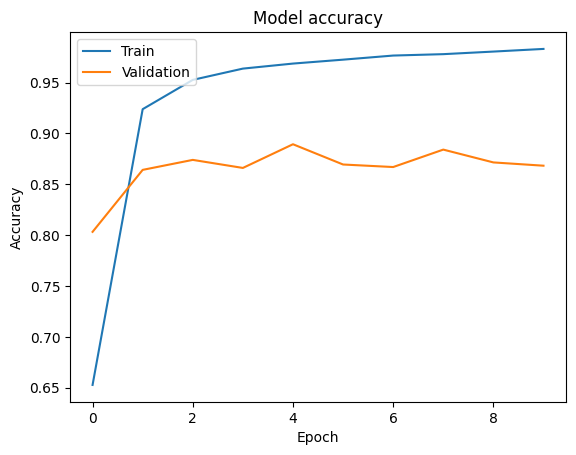

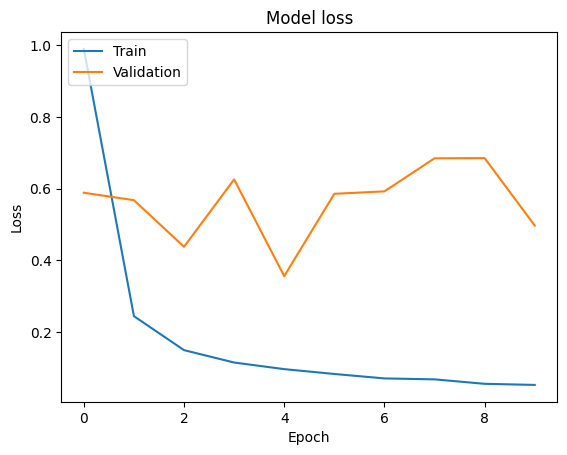

In [23]:
import matplotlib.pyplot as plt

history = model.fit_generator(
    generator=x_train,
    steps_per_epoch=len(x_train),
    epochs=10,
    validation_data=x_test,
    validation_steps=len(x_test)
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Saving the model

In [27]:
model.save('ECG.h5')

Test the Model

In [28]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model=load_model(r'C:\Users\Hp\Downloads\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\Training\ECG.h5')
img=image.load_img(r"C:\Users\Hp\Downloads\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\ECG-Image-Based-Heartbeat-Classification-for-Arrhythmia-Detection-main\Flask\uploads\PAC.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred


1/1 [==============================] - 0s 285ms/step


2

In [29]:
index=['left Bundle Branch block','Normal','Premature Atrial Contraction','Premature Ventricular Contraction','Right Bundle Branch Block','Ventricular Fibrillation']
result = str(index[y_pred])
result

'Premature Atrial Contraction'